<a href="https://colab.research.google.com/github/IvyAldama/EstructurasDeDatos/blob/main/Busqueda_No_Informada_Impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Búsqueda no informada

## Búsqueda primero en anchura / Breadth-First

El primero de los algoritmos a revisar es la búsqueda de soluciones primero en anchura (Breadth-first) [1][2]. Es común encontrar este método en recorrido de árboles pero está definido para grafos en general. La intuición es la siguiente:

1. Agregar a el nodo correspondiente al estado inicial a la lista de nodos a visitar
1. Mientras la lista de nodos a visitar no esté vacía
  1. Saca el nodo más viejo de la lista de nodos a visitar y agrega a lista de nodos visitados
  1. Si el nodo es el Final
    1. Solución encontrada
  1. Por cada uno de los arcos posibles del nodo
    1. Si el nodo conectado no está en la lista de nodos visitados
> 1. agrega nodo conectado a lista de nodos a visitar
1. Solución No encontrada


Para implementar este algoritmo, se deben usar dos listas: nodos visitados y nodos por visitar. Es importante revisar la forma de trabajo de estructuras FIFO/PEPS. Estas listas permiten que cada vez que se necesita sacar un elemento, sea el primero que se introdujo.

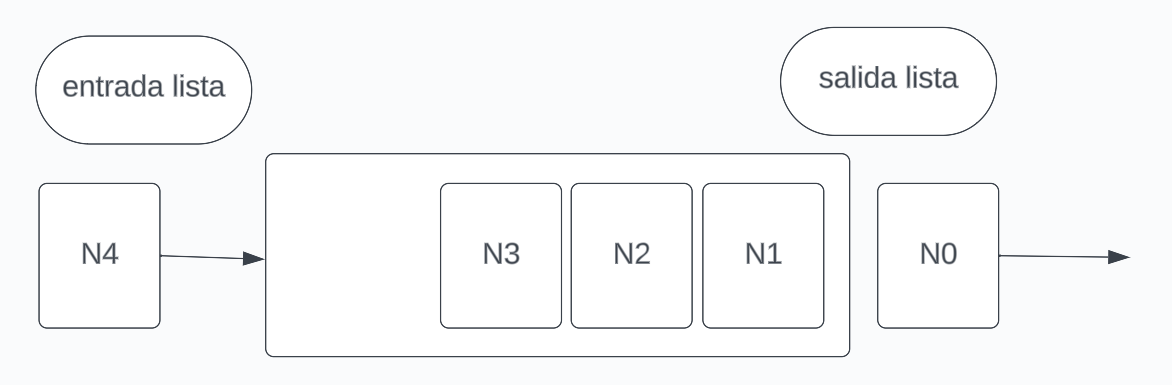

En Python, vamos a usar listas tradicionales que permiten introducir elementos (append) y luego obtener el más viejo (pop(0) ). En suma, implementaremos un árbol como solución a partir de la herramienta networkx. A través de esta librería incluso podemos mostrar gráficamente tanto el problema como la solución. Lo implementamos en seguida.

Importamos las herramientas necesarias. Los “!” son comandos para poder instalar herramientas a nivel del sistema operativo. En este caso, PyGraphViz. Es necesario para poder mostrar los árboles de solución en un formato más legible.


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

A diferencia de otras ocasiones, importaremos matplotlib, biblioteca para el manejo de gráficos. Es lo que tiene networkx como herramienta para mostrar las imágenes, sin embargo, es necesario agregar algunos parámetros que no son posibles con la llamada de nx.draw(). La herramienta de pandas será opcional, para mostrar una tabla de nuestras conexiones al estilo de una versión matricial del grafo.


La creación del grafo de procesos usa networkx. Este es el código. No existe valor en copiar a mano cada uno de las aristas. Puedes copiar y pegar el siguiente código:

In [ ]:
G = nx.Graph()
# Inicializacion del grafo
G.add_edge( "ProcesoA", "Inicio", weight = 0.5)
G.add_edge( "ProcesoA", "ProcesoAa0", weight = 0.1)
G.add_edge( "ProcesoAa0", "ProcesoAa1", weight = 0.05)
G.add_edge( "ProcesoAa0", "Inicio", weight = 0.8)
G.add_edge( "ProcesoAa1", "Inicio", weight = 0.9)
G.add_edge( "ProcesoB", "ProcesoBa0", weight = 0.1)
G.add_edge( "ProcesoB", "Inicio", weight = 0.5)
G.add_edge( "ProcesoBa1", "ProcesoBa2", weight = 0.4)
G.add_edge( "ProcesoC", "Inicio", weight = 0.5)
G.add_edge( "ProcesoBa0", "ProcesoBa1", weight = 0.2)
G.add_edge( "ProcesoC", "ProcesoCb0", weight = 0.2)
G.add_edge( "ProcesoBa2", "ProcesoCa0", weight = 0.6)
G.add_edge( "ProcesoCa0", "ProcesoBa0", weight = 0.06)
G.add_edge( "ProcesoC", "ProcesoAa0", weight = 0.25)
G.add_edge( "ProcesoC", "ProcesoCa0", weight = 0.2)
G.add_edge( "ProcesoCa0", "ProcesoCb0", weight = 0.01)
G.add_edge( "ProcesoBa0", "ProcesoAa0", weight = 0.1)
G.add_edge( "ProcesoBa1", "ProcesoAa1", weight = 0.2)
G.add_edge( "ProcesoBa2", "Final", weight = 0.0)
G.add_edge( "ProcesoBa2", "ProcesoA", weight = 0.4)
G.add_edge( "ProcesoCa0", "Final", weight = 0.0)


Al finalizar, G tiene todos los vértices necesarios con los pesos adecuados que implican el tiempo entre un proceso y otro.


Para mostrar el grafo anterior, podemos usar el siguiente código:


{('ProcesoA', 'Inicio'): Text(-0.5, -4.371138828673793e-08, '0.5'),
 ('ProcesoA',
  'ProcesoAa0'): Text(-0.7499999552965164, -0.4330127676341178, '0.1'),
 ('ProcesoA',
  'ProcesoBa2'): Text(-0.0669873058795929, 0.2499999860909341, '0.4'),
 ('Inicio',
  'ProcesoAa0'): Text(-0.24999995529651642, -0.4330127239227295, '0.8'),
 ('Inicio', 'ProcesoAa1'): Text(5.962440319251527e-09, -0.5, '0.9'),
 ('Inicio', 'ProcesoB'): Text(0.24999995529651642, -0.4330127239227295, '0.5'),
 ('Inicio', 'ProcesoC'): Text(0.24999980628490448, 0.43301281332969666, '0.5'),
 ('ProcesoAa0',
  'ProcesoAa1'): Text(-0.2499999493340761, -0.9330127239227295, '0.05'),
 ('ProcesoAa0',
  'ProcesoC'): Text(-1.4901161193847656e-07, 8.940696716308594e-08, '0.25'),
 ('ProcesoAa0',
  'ProcesoBa0'): Text(0.1830127090215683, -0.6830128133296967, '0.1'),
 ('ProcesoAa1',
  'ProcesoBa1'): Text(0.5000000059624403, -0.4999999125772234, '0.2'),
 ('ProcesoB',
  'ProcesoBa0'): Text(0.6830126196146011, -0.6830128133296967, '0.1'),
 ('Pro

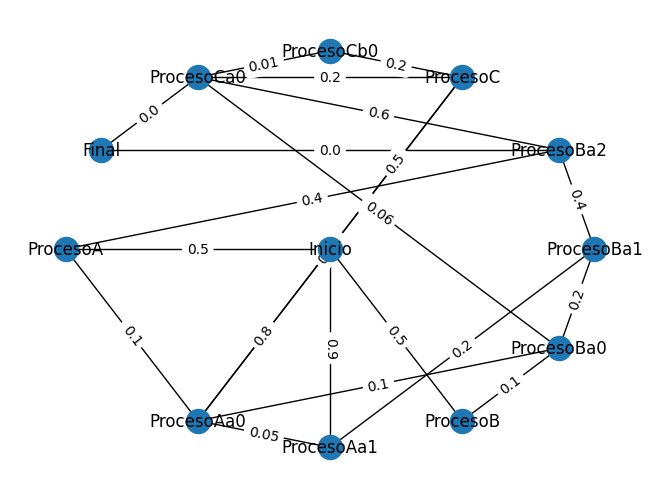

In [ ]:

# opcional
d = [] # lista para incluir el diccionario y crear el dataframe
for n in G.nodes: # por cada nodo en el grafo
  subd =  dict(G[n]) # se obtiene un diccionario donde cada clave es el nodo conectado y su
  # contenido es el peso de la arista. {nodoA:{weight:0.4},nodoB:{weight:0.2},.. }
  for i in subd: # para obtener el peso, ya no como un diccionario embedido sino como un peso directo, cambiar de {nodo:{weight:0.4}} a {nodo:0.4}
    subd[i] = subd[i]["weight"] # el diccionario anterior se sobreescribe con solamente el valor del peso.
  d.append(subd) # agregar el diccionario de las conexiones a la lista
  d[-1]["name"] = n # agrega el nombre del nodo en cuestion para que se muestre en la fila del dataframe

# pandas puede generar un dataframe usando una lista de diccionarios. La idea es construir una lista de diccionarios
# con las mismas llaves para poder convertertirlas en la misma columna.

df = pandas.DataFrame(d) # generacion de data frame usando la lista "d" que tiene las
# secuencias de [ {name:"nodo0", nodoA:0.3, nodoB:0:4}, {name:"nodoA", nodo0:0.3, nodoB:0:5} , .... ]

df.fillna(-1, inplace=True) # llena los datos sin cruce con -1
df.set_index("name",drop=True,inplace=True) # cambia de indices "normales" numericos, a el nombre del nodo
# acaba parte opcional

layout=nx.shell_layout(G) # obtención de un layout distinto al anteriormente usado
layout["Inicio"] = [0,0] # solo identificar el nodo inicial al centro de todo
labels2 = nx.get_edge_attributes(G,'weight') # agregar la información de ´pesos
nx.draw(G,layout,with_labels=True) # dibujar los nodos
nx.draw_networkx_edge_labels(G,layout,edge_labels=labels2) # dibujar los arcos

# finished layout

De hecho, todo el segmento anterior es totalmente opcional. Es muy común que en proyectos con datos, orientados a soluciones inteligentes, haya un estudio de la información para tratar de entenderla. Si ahora imprimir el DataFrame con “df”:


In [ ]:
df

,Inicio,ProcesoAa0,ProcesoBa2,ProcesoA,ProcesoAa1,ProcesoB,ProcesoC,ProcesoBa0,ProcesoBa1,ProcesoCa0,Final,ProcesoCb0
name,,,,,,,,,,,,
ProcesoA,0.5,0.10,0.4,-1.0,-1.00,-1.0,-1.00,-1.00,-1.0,-1.00,-1.0,-1.00
Inicio,-1.0,0.80,-1.0,0.5,0.90,0.5,0.50,-1.00,-1.0,-1.00,-1.0,-1.00
ProcesoAa0,0.8,-1.00,-1.0,0.1,0.05,-1.0,0.25,0.10,-1.0,-1.00,-1.0,-1.00
ProcesoAa1,0.9,0.05,-1.0,-1.0,-1.00,-1.0,-1.00,-1.00,0.2,-1.00,-1.0,-1.00
ProcesoB,0.5,-1.00,-1.0,-1.0,-1.00,-1.0,-1.00,0.10,-1.0,-1.00,-1.0,-1.00
ProcesoBa0,-1.0,0.10,-1.0,-1.0,-1.00,0.1,-1.00,-1.00,0.2,0.06,-1.0,-1.00
ProcesoBa1,-1.0,-1.00,0.4,-1.0,0.20,-1.0,-1.00,0.20,-1.0,-1.00,-1.0,-1.00
ProcesoBa2,-1.0,-1.00,-1.0,0.4,-1.00,-1.0,-1.00,-1.00,0.4,0.60,0.0,-1.00
ProcesoC,0.5,0.25,-1.0,-1.0,-1.00,-1.0,-1.00,-1.00,-1.0,0.20,-1.0,0.20


Queda claro el problema, además de ser exportable. Si ahora introduces el comando: “df.to_csv(“nombre_de_archivo.csv”), tu contenido estará disponible en el explorador de archivos de Google colab. Recuerda que éstos se borran cuando se desconecta la instancia.

El explorador de archivos se encuentra en el panel de la izquierda, en el icono de  carpeta.


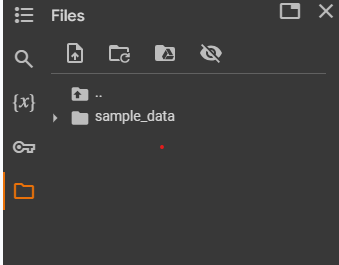

Es momento de implementar el Breadth-First. Dado que previamente discutimos la intuición del algoritmo, sólo es necesario puntualizar algunas situaciones. Aunque es posible usar la palabra nodo para definir el estado que se está tomando en cuenta, vamos a manejar la palabra para los elementos agregados a la solución. Se usará la palabra estado, para describir el nodo del grafo del problema. Igualmente las listas que se presentarán en el algoritmo, son secuencias de textos. No se guardarán nodos o estados en las filas, sino los textos que identifican a cada estado. La salida de nuestro algoritmo será también un árbol/grafo así como el valor del estado alcanzado. En caso de no encontrar una solución, éste último valor será la cadena vacía:””. El algoritmo usa una función auxiliar llamada create_solution_node que únicamente agrega el paso al árbol de la solución colocando la arista actualizando un valor llamado “pred” en cada nodo. Este valor es el nombre del nodo padre, para hacer más fácil nuestra evaluación de la ruta final posterior. A diferencia de otros pasos, vamos a partir la implementación y poder entender cada línea.

La inicialización de bfs:

In [ ]:
def bfs(graph, nodeName ):
  """
  graph un grafo de networkx que establece las aristas a otros productos y sus pesos de tiempo
  nodeName nombre del nodo inicial
  returns -> Regresa el árbol de solucion como un grafo de networkx
  """
  solutions_tree = nx.Graph() # grafo de solucion
  solutions_tree.add_node( nodeName)  # el primer elemento del grafo es el nodo que representa el estado inicial
  frontier = list() # lista para mantener los estados a visitar
  frontier.append(nodeName)  # el primer estado a visitar es el inicial, pasado por parametro
  visited = [nodeName] # el primer estado visitado es el inicial.
  return solutions_tree,""

Se inicializa el árbol de solución con un nuevo Grafo de nx. El primer elemento que se agrega es el estado donde debemos iniciar. Asimismo, frontier será la lista de estados a visitar mientras que la lista visited será la lista de estados visitados. El primero a visitar (para poder empezar el ciclo) y el primer visitado será el estado inicial.
La última línea irá para abajo en los pasos siguientes y actualmente está solo para completar la implementación.


 Para poder ir viendo nuestro resultado, vale la pena crear una función extra que dibuje la solución actual. Mira esta implementación:

In [ ]:
def printGraph(graph):
  plt.figure(3,figsize=(6,6)) # tamaño del gráfico de salida
  pos = nx.nx_agraph.graphviz_layout(graph, prog="twopi") # mejora en el acomodo de los nodos en el grafico, orientado a árboles
  nx.draw(graph, pos, with_labels=True) # dibuja usando matplotlib
  plt.show() # muestra la imagen

Recibiendo un gráfico, esta utilidad podrá mostrar la imagen del grafo de salida. Cabe destacar el uso de matplotlib y de  graphviz para poder acomodar los nodos y hacer en render final.

Intenta las siguientes líneas (que muestra el diagrama del nodo):

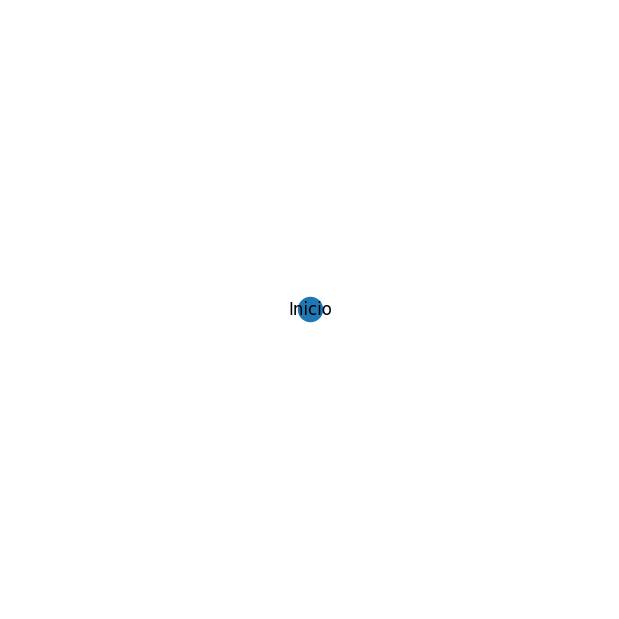

In [ ]:
tree, end_node  = bfs(G,"Inicio")
printGraph(tree)

Te invitamos a cambiar los parámetros de plt.figure para entender sus efectos.

Es necesario crear la función auxiliar create_solution_node:


In [ ]:
def create_solution_node(tree , parent_name,  original_node_name):
  tree.add_edge(parent_name, original_node_name) # agrega la arista en la solución
  tree.nodes[original_node_name]["pred"] = parent_name # coloca el dato del predecesor
  return original_node_name

Esta función hace la traducción del estado a nodo de solución agregándolo a tree. Posteriormente, el nodo en el árbol de solución tendrá agregado un dato – como ves, aquí no hay weights – llamado pred. Este valor es el nombre del nodo que representa el estado del que llegamos a este punto. Es decir, su predecesor. Es particularmente útil cuando queremos recorrer la ruta de regreso. Aunque en el árbol de solución está conectado, un nodo podría tener diferentes conexiones de acuerdo a sus posibles aristas.


Vamos con el ciclo en la lista de estados a visitar.


In [ ]:
def bfs(graph, nodeName ,end ):
  """
  graph un grafo de networkx que establece las aristas a otros productos y sus pesos de tiempo
  nodeName nombre del nodo inicial
  returns -> Regresa el árbol de solucion como un grafo de networkx
  """
  solutions_tree = nx.Graph() # grafo de solucion
  solutions_tree.add_node( nodeName)  # el primer elemento del grafo es el nodo que representa el estado inicial
  frontier = list() # lista para mantener los estados a visitar
  frontier.append(nodeName)  # el primer estado a visitar es el inicial, pasado por parametro
  visited = [nodeName] # el primer estado visitado es el inicial.

  while len(frontier) > 0: # mientras haya estados para visitar
    nn = frontier.pop(0) # toma siempre el elemento en 0.
    connections = graph[nn] # lista de conexiones con sus pesos en una estructura dict {'vecino1':{weight:<peso>}}.


    if end  in connections: # si el nodo ES el estado final
        new_node = create_solution_node(solutions_tree, nn , end ) # crea el nodo final
        return solutions_tree, nn # termina el algoritmo
  return solutions_tree,""

En este código se agregó el ciclo while para terminar cuando ya no existan más estados a visitar - todos han sido visitados.  La función __pop(0)__ remueve el primer valor de la lista; el más viejo de acuerdo a su fecha de introducción. El estado se usa para obtener todos los estados conectados con una arista. La variable __connections__ es un diccionario donde cada llave es el nombre del nodo conectado y el valor asignado es otro diccionario que solo tiene la llave “weight” y el valor determinado.
Si estado en el que se está actualmente es igual al estado final, el algoritmo ha llegado a su fin. En nuestra implementación, aunque no llegue al fin, termina la búsqueda. Esto se verá modificado en el siguiente paso. Puedes ejecutar el algoritmo nada más para saber que no estamos en ningún ciclo infinito ni existen problemas de compilación. La salida será la misma.


El momento final del algoritmo y cúspide del método:

In [ ]:
def bfs(graph, nodeName ,end ):
  """
  graph un grafo de networkx que establece las aristas a otros productos y sus pesos de tiempo
  nodeName nombre del nodo inicial
  returns -> Regresa el árbol de solucion como un grafo de networkx
  """
  solutions_tree = nx.Graph() # grafo de solucion
  solutions_tree.add_node( nodeName)  # el primer elemento del grafo es el nodo que representa el estado inicial
  frontier = list() # lista para mantener los estados a visitar
  frontier.append(nodeName)  # el primer estado a visitar es el inicial, pasado por parametro
  visited = [nodeName] # el primer estado visitado es el inicial.

  while len(frontier) > 0: # mientras haya estados para visitar
    nn = frontier.pop(0) # toma siempre el elemento en 0.
    connections = graph[nn] # lista de conexiones con sus pesos en una estructura dict {'vecino1':{weight:<peso>}}.


    if end  in connections: # si el nodo ES el estado final
        new_node = create_solution_node(solutions_tree, nn , end ) # crea el nodo final
        return solutions_tree, nn # termina el algoritmo

    for conn in connections: # por cada conexion del estado
      if not ( conn in visited): # si el estado siguiente no ha sido visitado
        visited.append(conn) # agrega el estado vecino a la lista de visitados
        next_st = create_solution_node(solutions_tree, nn , conn) # crea el nodo en la solucion
        frontier.append(next_st) #coloca el estado en la lista de los estados a visitar.

  return solutions_tree,""

El último ciclo anidado recorre cada una de las conexiones colocando los estados – cada una de las llaves del diccionario connections – como un nodo visitado y a visitar. Al mismo tiempo, se crea el nodo en la solución.


Es tiempo de ver el algoritmo funcionando, vuelve a ejecutar las líneas para su puesta en marcha:

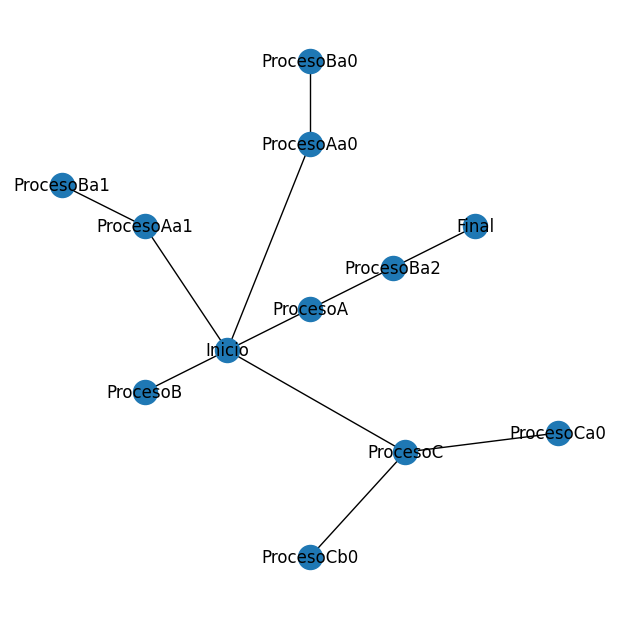

In [ ]:
tree, end_node  = bfs(G,"Inicio", "Final")
printGraph(tree)

Vale la pena detener este viaje para analizar el grafo. Si analizamos el camino desde Inicio, originalmente los estados que se agregaron a la lista a visitar fueron: Proceso Aa1, ProcesoA, ProcesoC, ProcesoB. Dado que originalmente son los estados conectados, son las primeras aristas exploradas. Posteriormente cada uno de ellos agregó nodos por los estados que faltaba por visitar, sin regresar a Inicio, ni tocar cualquier otro estado conectado por Inicio. La primer solución encontrada es a través del ProcesoA, que al expandir a ProcesoBa2 y finalmente expandir a Final, entra en la línea para identificar el estado objetivo. ¿Notas como ProcesoB parece que nunca fue expandido? Esto es por que sus conexiones son solo a Inicio y ProcesoBa0. El procesoAa0 se visitó primero, agregando ProcesoBa0 a los nodos por visitar y eliminándolo de las posibilidades de ser alcanzado desde ProcesoB. La forma final del grafo es aquella de un árbol que no tiene ciclos y que solo uno de los nodos representa el estado Final. Esto es ya, una solución al problema, pero __¿es la mejor solución?__


Para poder determinar el rendimiento de esta solución es necesario medir el tiempo del Estado de Inicio a Final pasando por los nodos proveídos. Para esto, es necesario implementar la siguiente función:

In [ ]:
def route_revenue(graph, tree, start , end ):# funcion de rendimiento
  """
  path un grafo de networkx con estructura lineal basado en el Grafo del problema original
  """
  node_name = end # empieza en el nodo final
  node = tree.nodes[node_name] # obtener nodo del árbol de solución

  time = 0
  while node_name is not start: # mientras no lleguemos al nodo inicial
    time += graph[node_name][node["pred"]]["weight"] # el tiempo es igual al peso de la arista que llega al node
    node_name = node["pred"] # actualiza el valor de node_name al previo
    node = tree.nodes[node_name] # actualiza el valor de node con la información del previo
  return time

Toma como entrada la solución propuesta (tree) y el grafo original (graph) además de los nombres de los estados de Inicio y Final.

El ciclo empieza en el nodo final y a partir de ese punto, recupera cada uno de los nombres de los predecesores, sumando en time, el valor del arco. Al final de la función, el valor total de time representa el rendimiento de esta solución. Cabe destacar que node es parte del árbol de solución, mientras que time obtiene la suma a partir del nombre de node y la característica pred del node. Pred se llenó con la función de create_solution_node. Usando estos dos elementos se consulta al Grafo original para sacar la propiedad weight de la conexión de node_name a node[“pred”]. El resto del algoritmo actualiza node_name con node[“pred”].


Ejecutando esta función:

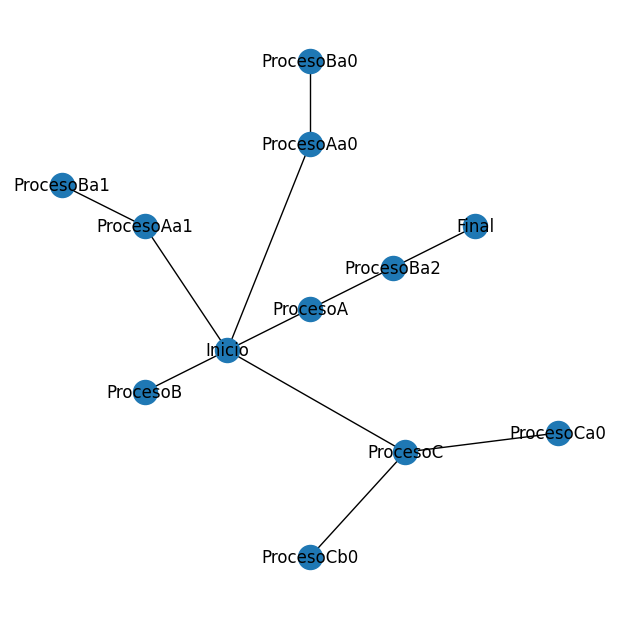

0.9

In [ ]:
tree, end_node  = bfs(G,"Inicio", "Final")
printGraph(tree)
route_revenue(G,tree, "Inicio", "Final")


Aparentemente el mejor, ¿verdad? Regresa al grafo original y busca esta ruta: Inicio-ProcesoB-ProcesoBa0-ProcesoCa0-Final. Si sumas los pesos, tendrás un total de 0.66. Menor a la solución previamente presentada. Significa que el algoritmo ¿no funciona? Por supuesto que funciona, solo que tiene esa característica. Cuando los arcos tienen pesos, no presenta la solución óptima. Sin embargo, siempre asegura encontrar una solución.

## Depth-First / Primero en profundidad

Si ya pudimos probar expandiendo todos los estados en orden, y tratando de ser muy extensivos, y de todos modos no pudimos encontrar la mejor solución, ¿Qué te parece encontrar una de forma más rápida? Si ves el grafo original, existe alguna manera, casi por cualquier medio de llegar al nodo final en una conexión. Si queremos implementar la solución que sea, yendo al máximo de las conexiones, podemos implementar el método Depth-first/Primero en profundidad (DFS)[1][2].

La gran diferencia está en la estructura de datos que se usa. Mientras que en Breadth-First/Primero en anchura (BFS) se usa una fila, en DFS se prefiere una pila. De esta manera, cuando se van introduciendo los siguientes nodos a visitar, el tope de la pila tiene el estado más lejano desde el origen. Mira el siguiente diagrama:


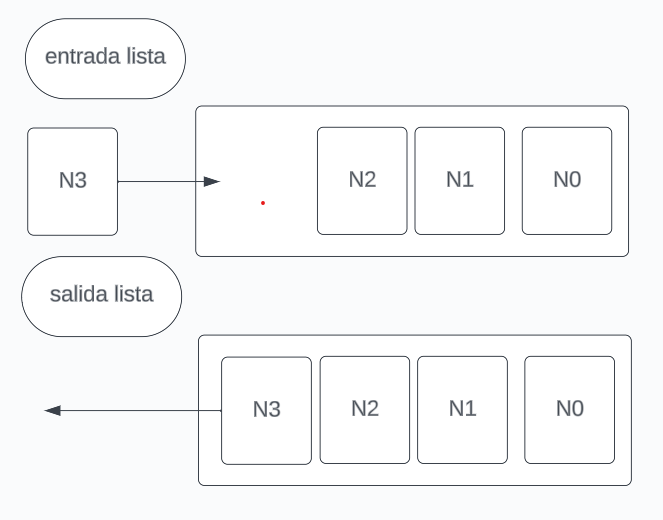

Puedes notar que el elemento N0 se quedará hasta que los elementos anteriores salgan; y eso contando que no entren más. Imaginando que N0 es el primer estado a visitar desde Inicio y N3 es el último, es claro que se da prioridad a los más nuevos. En suma, y dado que N3 se expande primero, los nodos conectados de N3 serán insertados en esta lista por encima de todos los anteriores. Esta intuición de DFS es un gran cambio.


Para poder implementar y probar si DFS puede brindar una mejor solución, podemos empezar con el algoritmo original de BFS y modificar la manera de meter y sacar elementos de frontier.


Agrega este código:

In [ ]:
def dfs(graph, nodeName, end):
  """
  graph un grafo de networkx que establece las aristas a otros productos y sus pesos de tiempo
  nodeName nombre del nodo inicial


  returns -> Regresa el árbol de solucion como un grafo de networkx, el tiempo total de la solución
  """
  solutions_tree = nx.Graph() # grafo de solucion
  solutions_tree.add_node( nodeName)  # el primer elemento del grafo es el nodo que representa el estado inicial
  frontier = list() # lista para mantener los estados a visitar
  frontier.append(nodeName)  # el primer estado a visitar es el inicial, pasado por parametro
  visited = [nodeName] # el primer estado visitado es el inicial.

  while len(frontier) > 0: # mientras haya estados para visitar
    nn = frontier.pop(-1) # toma siempre el elemento en 0. # <-------------------AQUI HAY CAMBIO
    connections = graph[nn] # lista de conexiones con sus pesos en una estructura dict {'vecino1':{weight:<peso>}}.


    if end  in connections: # si el nodo ES el estado final
        new_node = create_solution_node(solutions_tree, nn , end ) # crea el nodo final
        return solutions_tree, nn # termina el algoritmo

    for conn in connections:
      if not ( conn in visited):
        visited.append(conn) # solo el nombre
        new_node = create_solution_node(solutions_tree, nn , conn)
        frontier.append(new_node)


  return solutions_tree, 0,""

Si, es una copia de BFS con SOLO 1 cambio. En lugar de frontier.pop(0), frontier.pop(-1). Esto asegura que la lista se comporte como una pila, siempre retornando el valor que ha entrado al último.

Ejecuta con las siguientes líneas y mira el diagrama con el rendimiento calculado

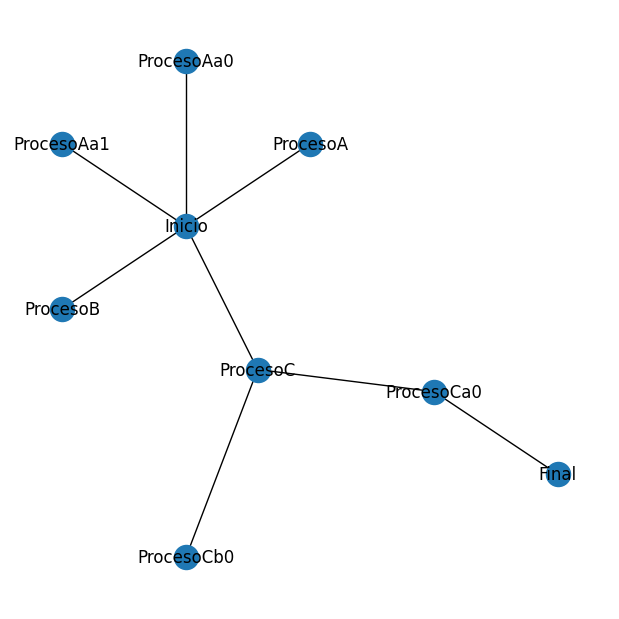

0.7

In [ ]:
tree, end_node  = dfs(G,"Inicio", "Final")
printGraph(tree)
route_revenue(G,tree, "Inicio", "Final")


Definitivamente mejor que BFS, pero todavía con espacio de mejora. Y la mala noticia, nos hemos acabado las opciones aparentes de algoritmos. Una variación que puede introducir nuevas rutas es el poder seleccionar la arista que se va a introducir, de manera aleatoria. Esto requiere un cambio parecido al siguiente:

```python
sorted_conn = sorted(connections)
for conn in connections:
  r = random.randint(0 , len(sorted_conn)-1)
  conn = sorted_conn.pop(r)

  if not (conn in visited):
    visited.append(conn)
```

Donde las conexiones se transfieran a otra estructura de datos – sorted_conn es una lista, ya no un diccionario. Una vez que se pueden acceder como listas, basta con ir obteniendo N valores aleatorios, donde N es la cantidad de conexiones. El valor aleatorio siempre estará entre 0 y la cantidad de conexiones que todavía existen en la lista. En cada iteración se elimina el valor seleccionado para actualizarla. De implementar esto, ¡algunas rutas cambian!


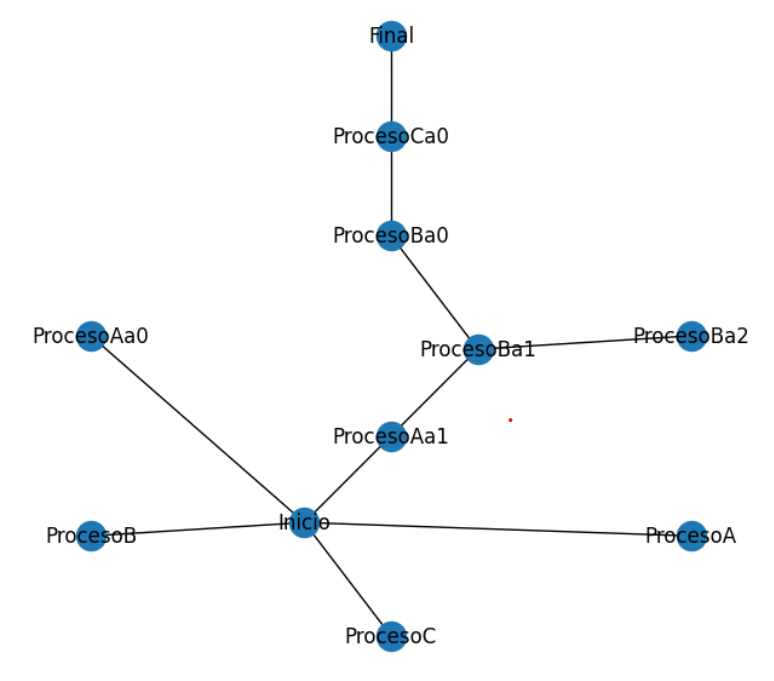

Aunque parece que ya no existe esperanza, todavía tenemos opciones. Justo esta es la razón de por qué científicos, académicos e industriales continúan en la búsqueda de formas y estilos para resolver problemas de los que ya se tienen solución. Aunque los dos anteriores nos ayudan con soluciones completas (pero no de costo mínimo) hay una tercera alternativa.

## Algoritmo de costo Uniforme

Para obtener resultados diferentes tenemos que cambiar la manera de actuar. El científico computacional Edsger Dijkstra (si con la S, así se llama, no es un error tipográfico) logró ver la luz del s.XXI en el 2002 [4]. Su algoritmo [3] ha formado parte de innumerables métodos para identificar rutas óptimas y probablemente ni él se imaginó todas las aplicaciones que ha tenido. La intuición del algoritmo es siempre seleccionar el arco más pequeño de la lista de opciones. El pseudocódigo es así:

1. Usando una lista de distancias a cada vértice, inicializar todas en un valor muy grande con excepción del nodo inicial, cuya distancia es 0.
1. Meter todos los vértices en una fila iniciando con el nodo inicial
1. Mientras la fila no esté vacía
  1. V = Seleccionar vértice de la fila con la menor distancia a él.
  1. Remover vértice seleccionado de la fila
  1. Por cada vecino U de V TODAVIA en la fila
    1. Alt = distancia a U más arista de V-U
    1. Si alt < distancia a U
      1. Distancia a U = Alt
      1. Predecesor de V es U

La lista de distancias a cada vértice se puede implementar como un diccionario o un arreglo si es que cada vértice tiene asignado un lugar específico de 0 a la cantidad de vértices. En el caso de esta implementación usaremos un diccionario.
El secreto del algoritmo está en el paso 3.3.i1 y 3.3.2, donde actualiza las rutas. Pudiera parecer que el paso 3.3, al evaluar que cada vecino de V todavía en la fila, es el mismo escenario de nodos visitados de DFS y BFS. Sin embargo, el algoritmo no tiene la noción de visitado. Es decir, solo coloca los vértices una vez desde el inicio (paso 2) y posteriormente los va removiendo, nunca agregando. El paso 3.1 también es crucial, ya que la lista de vértices se filtra por las aristas con el menor peso. ¿Qué pasaría si el grafo no tuviera pesos? El algoritmo tendría que obtener cualquier arista y no serviría para lo que fue diseñado: optimizar el costo.
La implementación requiere solo de una función extra y en general no vamos a producir un árbol como en la anterior, aunque si adaptaremos uno posteriormente. Esto se debe a que la salida del algoritmo es una sola ruta, no una exploración de ellas.
Podemos continuar en el mismo notebook, para comparar todas las opciones. Empecemos con la generación de una función que pueda seleccionar el menor valor de un diccionario siempre y cuando el elemento también se encuentre en una lista de nombres. Esto servirá para implementar el paso 3.1.:


In [ ]:
def min_dist(d_dist , q):
  a = 1000000000 # inicia con una distancia cercana a infinito, está es la mejor encontrada
  m = "" # el nombre del estado con menor distancia

  for d in d_dist: # por cada estado en el diccionario de distancias
    if d_dist[d] < a and d in q: # si la distancia es menor a la mejor encontrada, y elemento está en la fila q
      a = d_dist[d] # actualiza la mejor distancia
      m = d # toma el elemento como el mejor encontrado
  return m

Para ejemplificar esto mira la siguiente implementación:

In [ ]:
distances = {"":1,"b":2 , "c":3 , "d":4}
q1 = ["b","c","d"]

min_dist(distances, q1)

'b'

Es decir, aunque “a” era la mejor opción, el hecho de no estar en q1, hace que no sea parte de las alternativas. Esto ayudará al algoritmo de Dijkstra a solo obtener los menores valores de aquellos estados que todavía estén por procesarse.

Ahora si, podemos implementar el algoritmo:

In [ ]:
def dijkstra(graph, start, end):
  vertices = set(graph.nodes) # construye un conjunto de nodos. Es como una lista pero sin repeticiones.
  q = [i for i in vertices] # inicializa q con todos los estados
  dist = { i:10000000 for i in vertices } # inicializa el diccionario dist con distancias infinitas
  prev = { i:None for i in vertices } # inicializa el diccionario prev con nulos
  dist[start] = 0 # establece la distancia al nodo inicial como 0, para que sea el primer considerado

  while len(q) > 0: # mientras se tengan estados en q
    min_node = min_dist(dist , q) # obtener el minimo de dist que está también en q
    q.remove(min_node) # remover el nodo con la distancia minima

    connections = graph[min_node] # obtener las conexiones del estado


    for conn in connections: # por cada conexion
      if conn in q: # si el estado conectado está en q
        alt = dist[min_node] + connections[conn]["weight"] # determina la distancia hasta él

        if( alt < dist[conn] ): # si es mejor
          dist[conn] = alt # actualiza la distancia
          prev[conn] = min_node # actualiza el predecesor
  return dist, prev




Como ves, es prácticamente una transcripción del pseudocódigo. Hay que destacar que la distancia alternativa solo se calcula para aquellos estados que aún están en la fila q. Es decir, estados que ya fueron recorridos, son considerados como con una distancia mínima.

Para poder comparar este algoritmo con los demás, necesitamos acomodar la salida para tener un árbol - aunque en realidad es una ruta única:

In [ ]:
def build_line_graph(d,p,start, end):
  solution = nx.Graph()

  nn = end # iniciando desde el final
  while nn != start: #mientras no lleguemos al inicio
    solution.add_edge(nn,p[nn] , weight = d[nn] ) # agrega la arista al predecesor
    solution.nodes[nn]["pred"] = p[nn] # coloca el valor de pred, al nombre del predecesor
    # esto es para hacerlo compatible con los estandares de DFS y BFS
    nn = p[nn] # actualiza el valor del nodo actual

  return solution

Para probarlo, basta con colocar todo lo anterior:

Final
ProcesoCa0
ProcesoBa0
ProcesoB


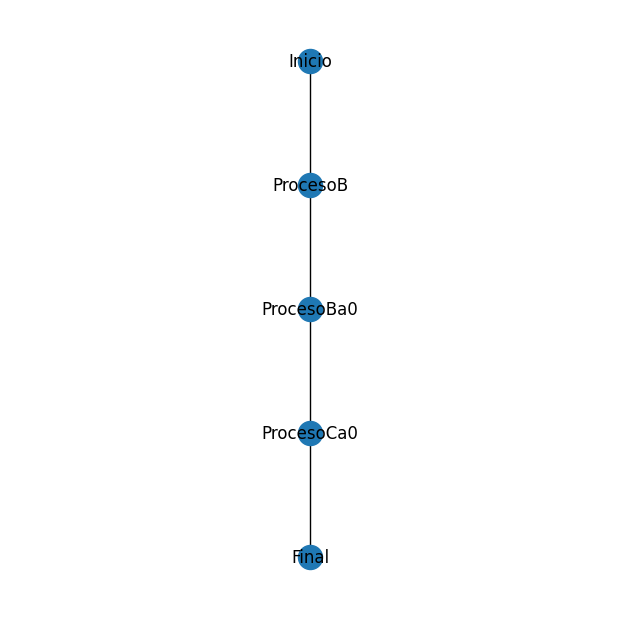

0.66

In [ ]:
d,p = dijkstra(G, "Inicio", "Final")
solution = build_line_graph(d,p,"Inicio","Final")
printGraph(solution)
route_revenue(G, solution, "Inicio","Final")

Que es consistente con lo que habíamos identificado previamente.

Es importante comentar que este algoritmo es Completo y de Costo Óptimo con algunas condiciones. Todos los pesos deben ser mayores a 0 y se necesita que el problema tenga una solución finita, o que los estados sean finitos. En este caso, nos permitió mejorar las soluciones presentadas.


Este es el final del caso, puedes continuar con la lectura del contenido.